In [28]:
import os
import pandas as pd
import json
import pickle
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

# 結果の可視化

In [13]:
workdir = Path(os.path.dirname(os.path.abspath("")))
reportsdir = workdir / 'output/reports'

In [22]:
sorted(reportsdir.iterdir())

[PosixPath('/code/output/reports/201910232337result.json'),
 PosixPath('/code/output/reports/201910240325result.json'),
 PosixPath('/code/output/reports/201910240730result.json'),
 PosixPath('/code/output/reports/201910242304result.json'),
 PosixPath('/code/output/reports/201910250021result.json'),
 PosixPath('/code/output/reports/201910250100result.json'),
 PosixPath('/code/output/reports/201910250318result.json'),
 PosixPath('/code/output/reports/_20191030-2252_NELseq20_baselstmresult.json'),
 PosixPath('/code/output/reports/_20191031-0020_NERseq20_baselstmresult.json'),
 PosixPath('/code/output/reports/baselstmresult.json')]

In [29]:
with open(str(reportsdir / '201910250100result.json'), 'r') as f:
    rep = json.load(f)

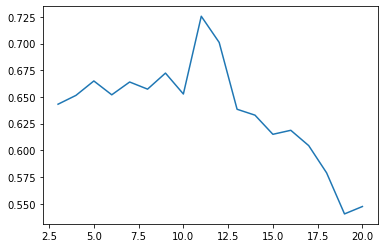

In [30]:
sns.lineplot(
    x=[i for i in range(3,21)],
    y=[r['best_eval_auc'] for r in rep]
)

In [24]:
with open(str(reportsdir / '_20191030-2252_NELseq20_baselstmresult.json'), 'r') as f:
    repNEL = json.load(f)
with open(str(reportsdir / '_20191031-0020_NERseq20_baselstmresult.json'), 'r') as f:
    repNER = json.load(f)

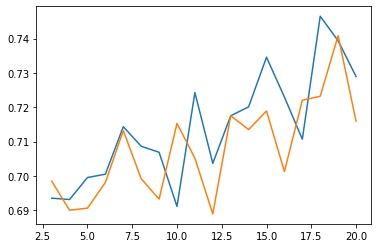

In [27]:
sns.lineplot(
    x=[i for i in range(3,21)],
    y=[r['best_eval_auc'] for r in repNEL]
)
sns.lineplot(
    x=[i for i in range(3,21)],
    y=[r['best_eval_auc'] for r in repNER]
)

# Asteriaのデータ分布を見る

In [31]:
with open(workdir / 'data/input/Asteria_Eng_ver5.pickle', 'rb') as f:
    data = pickle.load(f)

In [35]:
seqlen = []
for uid, seq in data.items():
    last_learned_sid = -1
    sid_len = 0
    for x in seq:
        sid = x[0]
        if sid == last_learned_sid:
            sid_len += 1
        elif sid != last_learned_sid and last_learned_sid == -1:
            last_learned_sid = sid
            continue
        else:
            seqlen.append(sid_len)
            sid_len = 0
            last_learned_sid = sid

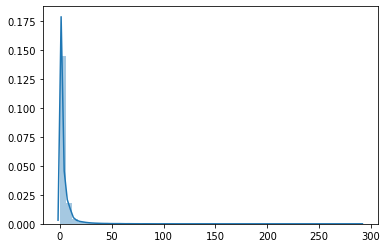

In [37]:
sns.distplot(seqlen)

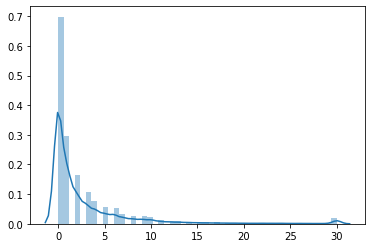

In [40]:
seqlen_zoom = []
for s in seqlen:
    limit = 30
    if s > limit:
        seqlen_zoom.append(limit)
    else:
        seqlen_zoom.append(s)
sns.distplot(seqlen_zoom)